In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import json

## ATIVIDADE 1

In [2]:
#with open('data/dados_discentes.json', 'r') as f:
f = open('discentes.json',encoding = "utf8")
data = json.load(f)
data

[{'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'M'},
   {'valor': 'Ensino Médio'},
   {'valor': '1 Sm < Rfp <= 1,5 Sm'},
   {'valor': 'Preta'},
   {'valor': '1979'},
   {'valor': 'Concluído'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'F'},
   {'valor': 'Ensino Médio'},
   {'valor': '1,5 Sm < Rfp <= 2,5 Sm'},
   {'valor': 'Parda'},
   {'valor': '1985'},
   {'valor': 'Concludente'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Moda

In [3]:
data

[{'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'M'},
   {'valor': 'Ensino Médio'},
   {'valor': '1 Sm < Rfp <= 1,5 Sm'},
   {'valor': 'Preta'},
   {'valor': '1979'},
   {'valor': 'Concluído'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Modalidade de Educação de Jovens e Adultos'},
   {'valor': 'Integrado - EJA'},
   {'valor': 'Presencial'},
   {'valor': 'F'},
   {'valor': 'Ensino Médio'},
   {'valor': '1,5 Sm < Rfp <= 2,5 Sm'},
   {'valor': 'Parda'},
   {'valor': '1985'},
   {'valor': 'Concludente'}]},
 {'itens': [{'valor': 'Câmpus Águas Lindas'},
   {'valor': '2014'},
   {'valor': '1'},
   {'valor': 'Técnico Integrado ao Ensino Médio em Enfermagem na Moda

In [4]:
df = {
    'campus': [],
    'ano': [],
    'semestre': [],
    'curso': [],
    'tipo_curso': [],
    'modalidade': [],
    'sexo': [],
    'escolaridade': [],
    'renda': [],
    'cor': [],
    'nascimento': [],
    'status': []
}

for itens in data:
    item = itens['itens']
    df['campus'].append(item[0]['valor'])
    df['ano'].append(item[1]['valor'])
    df['semestre'].append(item[2]['valor'])
    df['curso'].append(item[3]['valor'])
    df['tipo_curso'].append(item[4]['valor'])
    df['modalidade'].append(item[5]['valor'])
    df['sexo'].append(item[6]['valor'])
    df['escolaridade'].append(item[7]['valor'])
    df['renda'].append(item[8]['valor'])
    df['cor'].append(item[9]['valor'])
    df['nascimento'].append(item[10]['valor'])
    df['status'].append(item[11]['valor'])

df

{'campus': ['Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas Lindas',
  'Câmpus Águas

In [5]:
df = pd.DataFrame(df)

In [6]:
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63723,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"2,5 Sm < Rfp <= 3 Sm",Branca,1974,Evasão
63724,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63725,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63726,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão


In [7]:
#for col in df.columns:
    #print(df[[col]].groupby([col]).sum())

#não tem valores nulos

In [8]:
numericos = ['ano', 'semestre', 'nascimento']

df[numericos] = df[numericos].astype(int)

df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63728 entries, 0 to 63727
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   campus        63728 non-null  object
 1   ano           63728 non-null  int32 
 2   semestre      63728 non-null  int32 
 3   curso         63728 non-null  object
 4   tipo_curso    63728 non-null  object
 5   modalidade    63728 non-null  object
 6   sexo          63728 non-null  object
 7   escolaridade  63728 non-null  object
 8   renda         63728 non-null  object
 9   cor           63728 non-null  object
 10  nascimento    63728 non-null  int32 
 11  status        63728 non-null  object
dtypes: int32(3), object(9)
memory usage: 5.1+ MB


,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63723,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"2,5 Sm < Rfp <= 3 Sm",Branca,1974,Evasão
63724,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63725,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63726,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão


In [9]:
categoricos = [col for col in df.columns if col not in numericos]
categoricos
df_posprocessing = df.copy()
df_posprocessing = df_posprocessing.drop(columns=categoricos)

ohc = pd.get_dummies(df[categoricos])
df_posprocessing = pd.concat([df_posprocessing, ohc], axis=1, join='outer') #esta é uma maneira mais otimizada que as linhas abaixo (ver o warning)
#df_posprocessing[ohc.columns] = ohc
#df_posprocessing
df_posprocessing

,ano,semestre,nascimento,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,campus_Câmpus Goiânia Oeste,campus_Câmpus Inhumas,...,status_Formado,status_Intercâmbio,status_Jubilado,status_Matriculado,status_Matrícula Vínculo Institucional,status_Não Concluído,status_Projeto Final (Concludente),status_Trancado,status_Transferido Externo,status_Transferido Interno
0,2014,1,1979,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,1,1985,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,1,1980,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,1,1989,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,1,1981,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63723,2015,2,1974,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63724,2015,2,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63725,2015,2,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63726,2015,2,1986,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for col in df_posprocessing:
    print(col)

ano
semestre
nascimento
campus_Câmpus Anápolis
campus_Câmpus Aparecida de Goiânia
campus_Câmpus Cidade de Goiás
campus_Câmpus Formosa
campus_Câmpus Goiânia
campus_Câmpus Goiânia Oeste
campus_Câmpus Inhumas
campus_Câmpus Itumbiara
campus_Câmpus Jataí
campus_Câmpus Luziânia
campus_Câmpus Senador Canedo
campus_Câmpus Uruaçu
campus_Câmpus Valparaíso
campus_Câmpus Virtual de Ead
campus_Câmpus Águas Lindas
campus_Polo Anápolis
campus_Polo Aparecida de Goiânia
campus_Polo Catalão
campus_Polo Cidade de Goiás
campus_Polo Formosa
campus_Polo Goianésia
campus_Polo Goiânia
campus_Polo Goiânia Oeste
campus_Polo Inhumas
campus_Polo Itumbiara
campus_Polo Jatai
campus_Polo Luziânia
campus_Polo Senador Canedo
campus_Polo Uruaçu
campus_Polo Valparaíso de Goiás
campus_Polo Águas Lindas de Goiás
curso_Alunos Especiais - Mestrado - Câmpus Anápolis
curso_Alunos Especiais - Mestrado - Câmpus Aparecida
curso_Alunos Especiais - Mestrado - Câmpus Goiânia
curso_Alunos Especiais - Mestrado - Câmpus Jataí
curso_Ba

In [11]:
df_posprocessing[['semestre']].describe()

,semestre
count,63728.000000
mean,1.289622
std,0.454868
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [12]:
for col in numericos:
    df_posprocessing[col] = (df_posprocessing[col] - df_posprocessing[col].min()) / (df_posprocessing[col].max() - df_posprocessing[col].min())

In [13]:
df_posprocessing[numericos]

,ano,semestre,nascimento
0,0.428571,0.5,0.014911
1,0.428571,0.5,0.016044
2,0.428571,0.5,0.015100
3,0.428571,0.5,0.016799
4,0.428571,0.5,0.015289
...,...,...,...
63723,0.500000,1.0,0.013968
63724,0.500000,1.0,0.016610
63725,0.500000,1.0,0.016610
63726,0.500000,1.0,0.016233


In [14]:
df_posprocessing.corr()['status_Não Concluído']

ano                                   0.019876
semestre                              0.033893
nascimento                           -0.001406
campus_Câmpus Anápolis               -0.005865
campus_Câmpus Aparecida de Goiânia   -0.004421
                                        ...   
status_Não Concluído                  1.000000
status_Projeto Final (Concludente)   -0.000699
status_Trancado                      -0.005014
status_Transferido Externo           -0.004677
status_Transferido Interno           -0.001936
Name: status_Não Concluído, Length: 246, dtype: float64

## ATIVIDADE 2

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


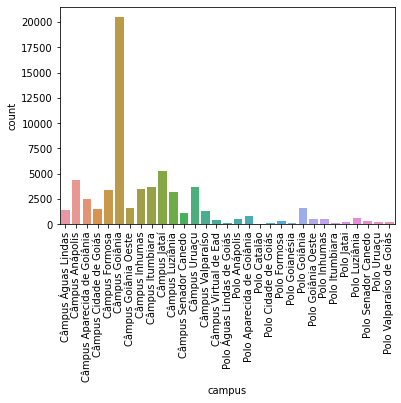

In [15]:
sns.countplot(df['campus']).tick_params(axis='x', rotation=90)

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sexo', ylabel='count'>

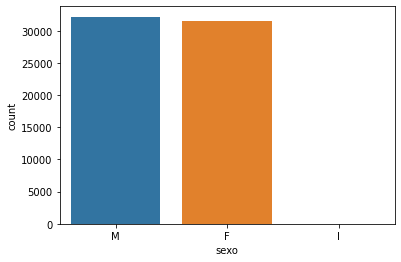

In [16]:
sns.countplot(df['sexo'])

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


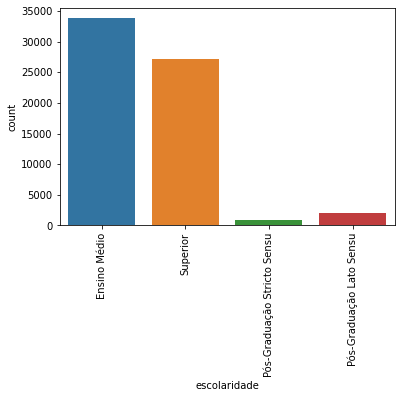

In [17]:
sns.countplot(df['escolaridade']).tick_params(axis='x', rotation=90)

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


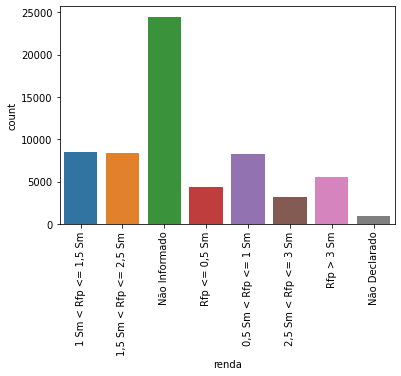

In [18]:
sns.countplot(df['renda']).tick_params(axis='x', rotation=90)

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


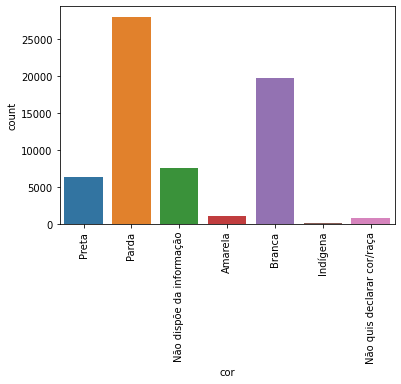

In [19]:
sns.countplot(df['cor']).tick_params(axis='x', rotation=90)

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


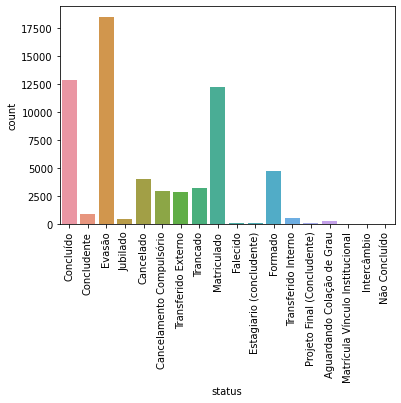

In [20]:
sns.countplot(df['status']).tick_params(axis='x', rotation=90) #situacao em que se encontra

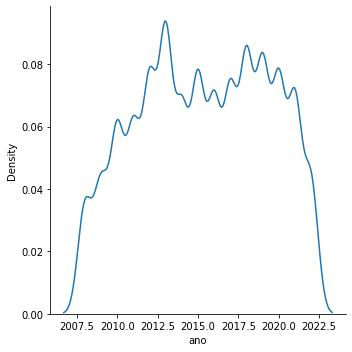

In [21]:
sns.displot(df['ano'],kind = 'kde')

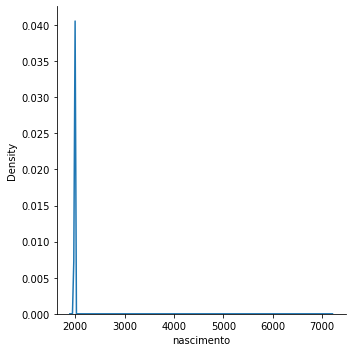

In [22]:
sns.displot(df['nascimento'], kind = 'kde')

In [23]:
#df['nacimento']
#df1 = df.query("nascimento < 1970 & nascimento > 2010")
df1 = df[df['nascimento']<2010]

In [24]:
df1.count()

campus          63697
ano             63697
semestre        63697
curso           63697
tipo_curso      63697
modalidade      63697
sexo            63697
escolaridade    63697
renda           63697
cor             63697
nascimento      63697
status          63697
dtype: int64

In [25]:
#df.sort_values(by=['curso'])['curso'].nunique()
df.groupby('curso')['curso'].nunique() # alunos especiais não é um curso, inconsistência

curso
Alunos Especiais - Mestrado - Câmpus Anápolis          1
Alunos Especiais - Mestrado - Câmpus Aparecida         1
Alunos Especiais - Mestrado - Câmpus Goiânia           1
Alunos Especiais - Mestrado - Câmpus Jataí             1
Bacharelado em Agronomia                               1
                                                      ..
Técnico Subsequente ao Ensino Médio em Mecânica        1
Técnico Subsequente ao Ensino Médio em Mineração       1
Técnico Subsequente em Agrimensura                     1
Técnico Subsequente em Eletrotécnica                   1
Técnico em Informática para Internet - Concomitante    1
Name: curso, Length: 157, dtype: int64

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ano', ylabel='status'>

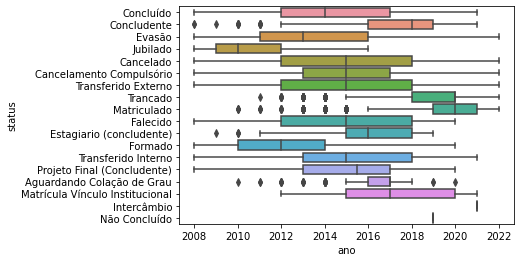

In [26]:
sns.boxplot(df['ano'],df['status']) # 11 e 1

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nascimento', ylabel='status'>

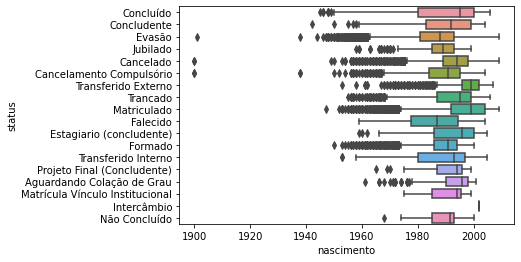

In [27]:
sns.boxplot(df1['nascimento'],df1['status'])

<AxesSubplot:xlabel='status', ylabel='campus'>

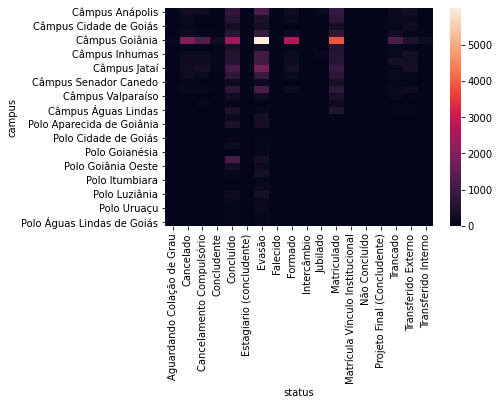

In [28]:
sns.heatmap(pd.crosstab(df['campus'],df['status']))

In [29]:
df_posprocessing

,ano,semestre,nascimento,campus_Câmpus Anápolis,campus_Câmpus Aparecida de Goiânia,campus_Câmpus Cidade de Goiás,campus_Câmpus Formosa,campus_Câmpus Goiânia,campus_Câmpus Goiânia Oeste,campus_Câmpus Inhumas,...,status_Formado,status_Intercâmbio,status_Jubilado,status_Matriculado,status_Matrícula Vínculo Institucional,status_Não Concluído,status_Projeto Final (Concludente),status_Trancado,status_Transferido Externo,status_Transferido Interno
0,0.428571,0.5,0.014911,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.428571,0.5,0.016044,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.428571,0.5,0.015100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.428571,0.5,0.016799,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.428571,0.5,0.015289,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63723,0.500000,1.0,0.013968,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63724,0.500000,1.0,0.016610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63725,0.500000,1.0,0.016610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63726,0.500000,1.0,0.016233,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ano', ylabel='status'>

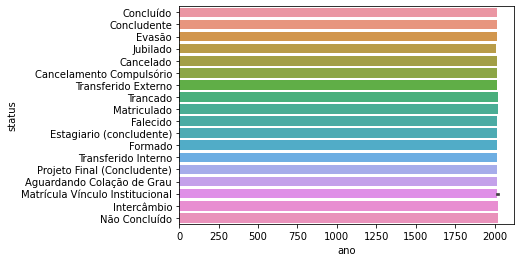

In [30]:
temp = df[df['ano']>=2008]
sns.barplot(temp['ano'],df['status'])

## ATIVIDADE 3

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [32]:
curso_data = df['curso'].drop_duplicates()
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(curso_data)


In [33]:
n_clusters = 22
km = KMeans(n_clusters=n_clusters, random_state=47)
km.fit(x_tfidf)

KMeans(n_clusters=22, random_state=47)

In [34]:
score = silhouette_score(x_tfidf.toarray(), km.labels_)
score

0.13557812608801845

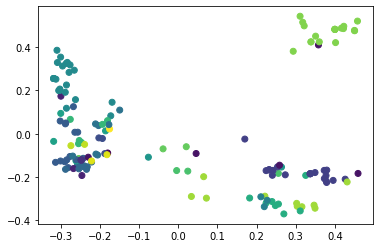

In [35]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x_tfidf.toarray())
plt.scatter(pca_x[:,0], pca_x[:, 1], c= km.labels_)
# plt.show()

Text(0.5, 0, 'Z-axis')

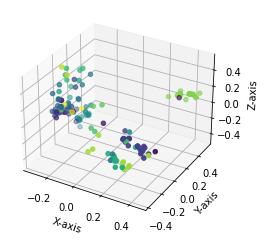

In [36]:
pca = PCA(n_components=3)
pca_x = pca.fit_transform(x_tfidf.toarray())
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = pca_x[:, 0]
y_vals = pca_x[:, 1]
z_vals = pca_x[:, 2]

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = km.labels_)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# plt.show()


In [37]:
km.labels_

array([17,  4,  4, 15,  7,  2, 10,  4, 11,  4, 13, 17, 18,  7,  4, 17,  6,
       16, 14,  6,  4, 17,  7, 17,  7, 17,  4, 12, 17,  4,  4,  6,  7, 17,
        6,  4,  1,  4, 17, 10,  4,  5,  6, 16,  0, 10, 10, 10, 10, 10, 10,
       10, 10,  2, 10, 10, 10, 11,  4,  4, 18,  4, 17,  4, 15, 18, 18, 18,
       18, 15,  4,  5,  7,  6,  7, 17, 10, 10, 10, 10, 10,  7, 12,  6,  6,
        2,  6,  6,  8, 14,  7, 17, 17,  6,  4,  6,  7, 17,  8,  8, 10, 17,
        8, 18, 12, 12,  7,  4, 21, 20,  1,  1, 10, 14,  6, 18, 18,  4, 17,
        8,  8, 16, 10,  4, 18, 10, 19, 17,  1, 19,  4, 14, 17,  6, 14,  1,
       17,  5,  8, 17,  3,  3,  3, 10,  3, 13, 13, 13, 13, 13, 13, 20, 14,
        9, 13,  9,  9])

In [38]:
results = [[] for i in range(n_clusters)]
data = curso_data.to_numpy()
for i, label in enumerate(km.labels_):
    results[label].append(data[i])
    #print(data[i])

In [39]:
# print(results)
for i, l in enumerate(results):
    print("cluster ", i)
    print(l)

cluster  0
['Intercâmbio Cultural Brasil/alemanha']
cluster  1
['Técnico Integrado ao Ensino Médio em Manutenção e Suporte em Informática na Modalidade de Educação de Jovens e Adultos', 'Bacharelado em Informática', 'Técnico Integrado ao Ensino Médio em Informática', 'Técnico Integrado ao Ensino Médio em Manutenção e Suporte em Informática', 'Técnico Integrado em Manutenção e Suporte em Informática']
cluster  2
['Licenciatura em Química', 'Superior de Tecnologia em Química Agroindustrial', 'Bacharelado em Química']
cluster  3
['Alunos Especiais - Mestrado - Câmpus Goiânia', 'Alunos Especiais - Mestrado - Câmpus Jataí', 'Alunos Especiais - Mestrado - Câmpus Anápolis', 'Alunos Especiais - Mestrado - Câmpus Aparecida']
cluster  4
['Técnico Integrado ao Ensino Médio em Vigilância em Saúde', 'Técnico Integrado ao Ensino Médio em Análises Clínicas', 'Técnico Integrado ao Ensino Médio em Edificações', 'Técnico Integrado ao Ensino Médio em Química', 'Técnico Integrado ao Ensino Médio em Comérc

# Atividade 4

Alunos com baixa renda familiar tenderam a evadir mais na modalidade a distancia?

A idade dos alunos influencia na taxa de evasão?

Qual a taxa de evasão por grupo racial?

In [40]:
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63723,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"2,5 Sm < Rfp <= 3 Sm",Branca,1974,Evasão
63724,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63725,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63726,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão


In [41]:
questao_1 = df[df["modalidade"] == "À Distância"].groupby("renda").count()
questao_1_evadiu = df[df["modalidade"] == "À Distância"][df["status"] == "Evasão"].groupby("renda").count()
questao_1["taxa"] = (questao_1_evadiu["status"]/questao_1["status"])*100


C:\Users\cesar\AppData\Local\Temp/ipykernel_1508/722877391.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  questao_1_evadiu = df[df["modalidade"] == "À Distância"][df["status"] == "Evasão"].groupby("renda").count()


In [42]:
questao_1

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,cor,nascimento,status,taxa
renda,,,,,,,,,,,,
"0,5 Sm < Rfp <= 1 Sm",359,359,359,359,359,359,359,359,359,359,359,56.545961
"1 Sm < Rfp <= 1,5 Sm",406,406,406,406,406,406,406,406,406,406,406,44.581281
"1,5 Sm < Rfp <= 2,5 Sm",429,429,429,429,429,429,429,429,429,429,429,34.032634
"2,5 Sm < Rfp <= 3 Sm",151,151,151,151,151,151,151,151,151,151,151,31.125828
Não Declarado,52,52,52,52,52,52,52,52,52,52,52,40.384615
Não Informado,4769,4769,4769,4769,4769,4769,4769,4769,4769,4769,4769,47.703921
"Rfp <= 0,5 Sm",91,91,91,91,91,91,91,91,91,91,91,36.263736
Rfp > 3 Sm,311,311,311,311,311,311,311,311,311,311,311,35.369775


c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


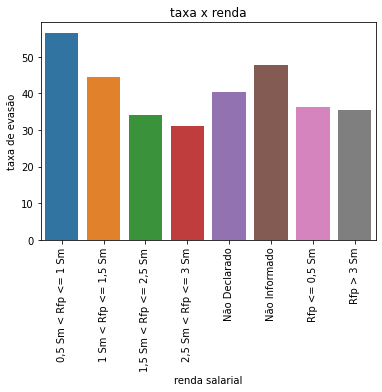

In [43]:
fig = sns.barplot(questao_1.index, questao_1["taxa"]).tick_params(axis='x', rotation = 90)
plt.xlabel("renda salarial")
plt.ylabel("taxa de evasão")
plt.title("taxa x renda") # You can comment this line out if you don't need title
plt.show(fig)


In [44]:

questao_2 = df.groupby("nascimento").count()
questao_2_evadiu = df[df["status"] == "Evasão"].groupby("nascimento").count()

questao_2["taxa"] = (questao_2_evadiu["status"]/questao_2["status"])*100
questao_2 = questao_2[questao_2["status"] > 245]

c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


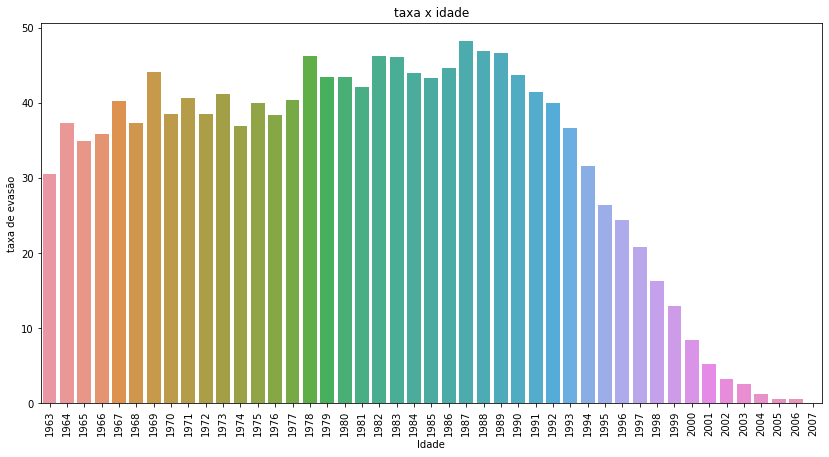

<Figure size 864x864 with 0 Axes>

In [45]:
plt.rcParams['figure.figsize'] = [14, 7]
fig = sns.barplot(questao_2.index, questao_2["taxa"]).tick_params(axis='x', rotation = 90)
plt.xlabel("Idade")
plt.ylabel("taxa de evasão")
plt.title("taxa x idade") # You can comment this line out if you don't need title
plt.figure(figsize=(12,12))
plt.show(fig)

In [46]:
questao_3 = df.groupby("cor").count()
questao_3_evadiu = df[df["status"] == "Evasão"].groupby("cor").count()
questao_3["taxa"] = (questao_3_evadiu["status"]/questao_3["status"])*100

In [47]:
questao_3

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,nascimento,status,taxa
cor,,,,,,,,,,,,
Amarela,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,30.447471
Branca,19720,19720,19720,19720,19720,19720,19720,19720,19720,19720,19720,25.212982
Indígena,164,164,164,164,164,164,164,164,164,164,164,29.878049
Não dispõe da informação,7592,7592,7592,7592,7592,7592,7592,7592,7592,7592,7592,43.177028
Não quis declarar cor/raça,822,822,822,822,822,822,822,822,822,822,822,25.060827
Parda,28061,28061,28061,28061,28061,28061,28061,28061,28061,28061,28061,28.185025
Preta,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341,27.897808


In [48]:
questao_3_evadiu

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,nascimento,status
cor,,,,,,,,,,,
Amarela,313,313,313,313,313,313,313,313,313,313,313
Branca,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972
Indígena,49,49,49,49,49,49,49,49,49,49,49
Não dispõe da informação,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278,3278
Não quis declarar cor/raça,206,206,206,206,206,206,206,206,206,206,206
Parda,7909,7909,7909,7909,7909,7909,7909,7909,7909,7909,7909
Preta,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769


c:\Users\cesar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


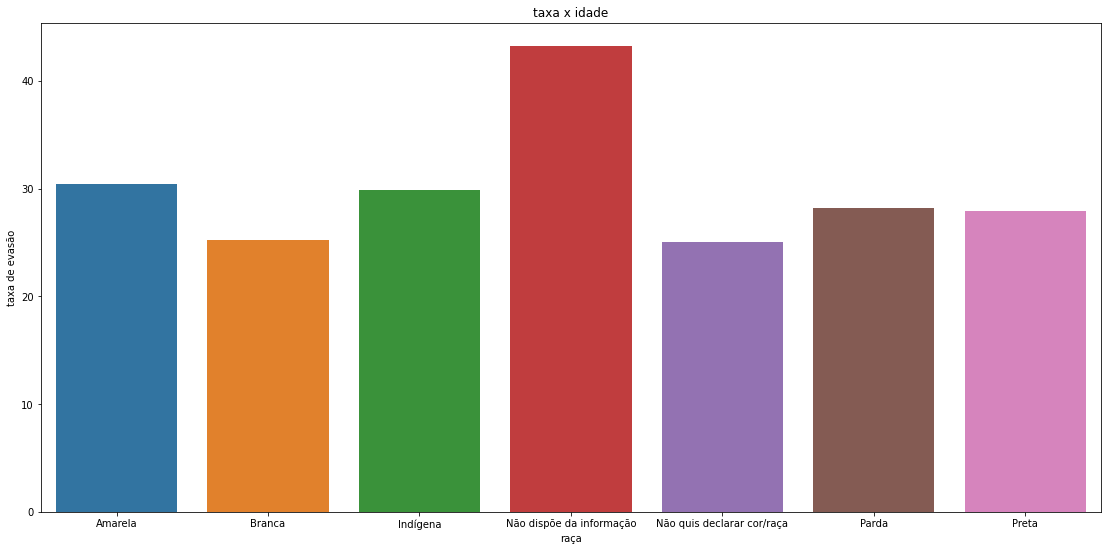

<Figure size 864x864 with 0 Axes>

In [49]:
plt.rcParams['figure.figsize'] = [19, 9]
fig = sns.barplot(questao_3.index, questao_3["taxa"])
plt.xlabel("raça")
plt.ylabel("taxa de evasão")
plt.title("taxa x idade") # You can comment this line out if you don't need title
plt.figure(figsize=(12,12))
plt.show(fig)

## Tarefa 2


In [50]:
# from sklearn.cluster import DBSCAN

In [51]:
# df_2 = df[df["status"]== "Evasão"][["ano", "escolaridade", "renda", "nascimento"]]

In [52]:
# df_2 = pd.get_dummies(df_2)

In [53]:
# pca = PCA(n_components=2)
# pca_x = pca.fit_transform(df_2)

In [54]:
def search_parameters_kmeans(X, n_clusters=[]):
    score = float("-inf")
    n_total = 0
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        new_score = silhouette_score(X, kmeans.labels_)

        print("n_cluster:", n, "score:", new_score)
        if new_score > score:
            score = new_score
            n_total = n
            
    return score, n_total


def search_parameters_dbscan(X, eps = [], min_samples = []):
    score = float("-inf")
    e_final = 0
    ms_final = 0
    for e in eps:
        for ms in min_samples:
            dbscan = DBSCAN(eps=e, min_samples=ms)
            dbscan.fit(X)
            new_score = silhouette_score(X, dbscan.labels_)

            print("eps:", e, "ms:", ms, "score:", new_score)
            if new_score > score:
                score = new_score
                e_final = e
                ms_final = ms
            
    return score, e_final, ms_final


In [55]:
# score_2, n_clusters_2 = search_parameters_kmeans(df_2, n_clusters= range(2, 10))
# n_cluster_2 = 2

In [56]:
# kmeans = KMeans(n_clusters=n_clusters_2, random_state=47)
# kmeans.fit(df_2)

# score = silhouette_score(df_2, kmeans.labels_)
# score

In [57]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= kmeans.labels_)
# plt.show()

In [58]:
# db_score_2, eps_2, min_samples_2 = search_parameters_dbscan(df_2, eps = range(1, 11), min_samples = range(2, 5))
# eps_2 = 7
# min_samples_2 = 2

In [59]:
#eps: 7, ms: 2
#n_cluster: 2

In [60]:
# dbscan = DBSCAN(eps=eps_2, min_samples=min_samples_2).fit(df_2)
# score = silhouette_score(df_2, dbscan.labels_)
# score

In [61]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= dbscan.labels_)
# plt.show()

In [62]:
# df_3 = df[df["status"]== "Evasão"][["campus", "curso", "tipo_curso", "modalidade", "sexo", "cor"]]

In [63]:
# df_3 = pd.get_dummies(df_3)

In [64]:
# score_km_3, n_cluster_3 = search_parameters_kmeans(df_3, range(550, 700, 10)) 
# n_cluster_3 = 600

In [65]:
# kmeans = KMeans(n_clusters=n_cluster_3)
# kmeans.fit(df_3)

# score = silhouette_score(df_3, kmeans.labels_)
# score

In [66]:
# pca = PCA(n_components=2)
# pca_x = pca.fit_transform(df_3)

In [67]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= kmeans.labels_)
# plt.show()

In [68]:
# db_score_3, eps_3, min_samples_3 = search_parameters_dbscan(df_3, eps = [0.5], min_samples = [1])

In [69]:
# dbscan = DBSCAN(eps=1, min_samples=min_samples_3).fit(df_3)
# score = silhouette_score(df_3, dbscan.labels_)
# score

In [70]:
# plt.scatter(pca_x[:,0], pca_x[:, 1], c= dbscan.labels_)
# plt.show()

In [71]:
df

,campus,ano,semestre,curso,tipo_curso,modalidade,sexo,escolaridade,renda,cor,nascimento,status
0,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1979,Concluído
1,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1985,Concludente
2,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1980,Concluído
3,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,Não Informado,Não dispõe da informação,1989,Evasão
4,Câmpus Águas Lindas,2014,1,Técnico Integrado ao Ensino Médio em Enfermage...,Integrado - EJA,Presencial,F,Ensino Médio,"1,5 Sm < Rfp <= 2,5 Sm",Parda,1981,Concluído
...,...,...,...,...,...,...,...,...,...,...,...,...
63723,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"2,5 Sm < Rfp <= 3 Sm",Branca,1974,Evasão
63724,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"0,5 Sm < Rfp <= 1 Sm",Parda,1988,Evasão
63725,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,F,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Preta,1988,Evasão
63726,Polo Valparaíso de Goiás,2015,2,Curso Técnico Subsequente ao Ensino Médio em S...,Subsequente,À Distância,M,Ensino Médio,"1 Sm < Rfp <= 1,5 Sm",Parda,1986,Evasão


In [72]:
def troca(item):
    if item in ["Evasão", "Cancelamento Compulsório", "Jubilado", "Cancelado"]:
        return 0
    elif item in ["Concluído", "Formado"]:
        return 1
    else:
        return -1

In [73]:
new_df = df.copy()
new_df["status"] = new_df["status"].apply(lambda x : troca(x) if troca(x)==1 or troca(x)==0 else x)
new_df = pd.concat([new_df[new_df["status"] == 0], new_df[new_df["status"] == 1]], ignore_index=True)


In [74]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle = True)
y = new_df['status'].astype("category").cat.codes
x = pd.get_dummies(new_df[["campus","curso","tipo_curso","modalidade","sexo","escolaridade","renda","cor"]])

In [75]:
x["nascimento"] = new_df["nascimento"]
x["semestre"] = new_df["semestre"]
x["ano"] = new_df["ano"]

TRAIN: [    0     2     3 ... 43435 43436 43438] TEST: [    1    16    17 ... 43430 43437 43439]
0.678414754863203
0.7235267034990792
f1: 0.1356829509726406


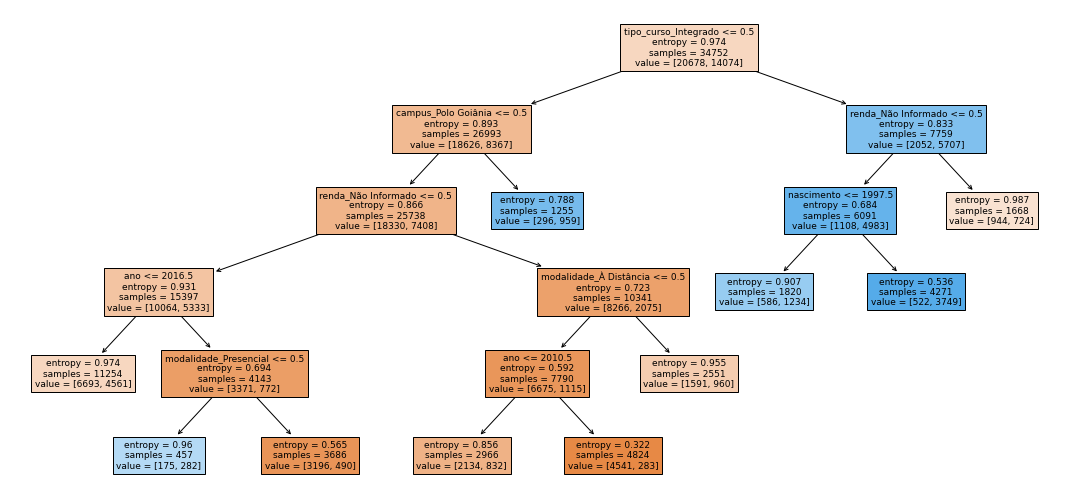

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score
mean = 0
clf = DecisionTreeClassifier(random_state=0,criterion = "entropy", max_depth = 5, max_leaf_nodes=10)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index, :], x.loc[test_index, :]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mean += f1_score(y_test,y_pred, average = "macro")
    print(f1_score(y_test,y_pred, average = "macro"))
    print(accuracy_score(y_test,y_pred))
    plot_tree(clf, filled=True, feature_names = x_train.columns)

    plt.savefig("arvore.pdf")
    break
print("f1:",mean/5)

TRAIN: [    0     1     2 ... 43437 43438 43439] TEST: [    3     5     8 ... 43424 43426 43429]
0.753683241252302
0.7420106835045092


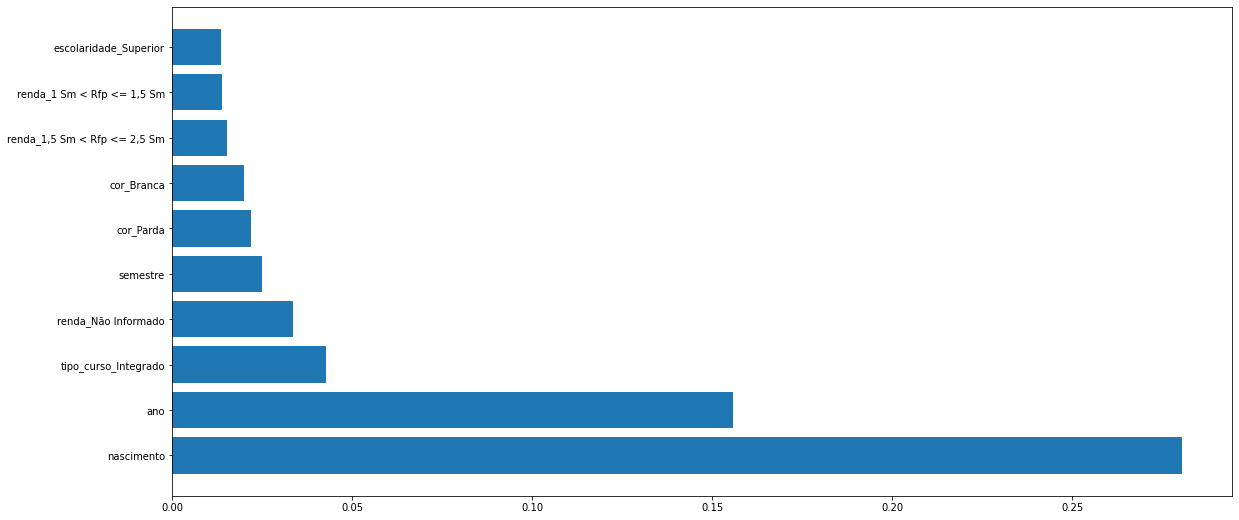

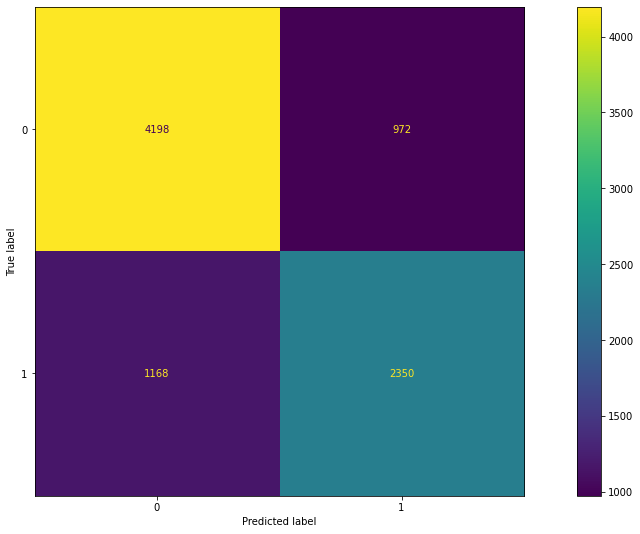

f1: 0.7420106835045092


In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import numpy as np
mean = 0
rf = RandomForestClassifier(n_jobs = -1, random_state = 42,criterion='entropy')
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index, :], x.loc[test_index, :]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(accuracy_score(y_test,y_pred))
    mean += f1_score(y_test,y_pred, average = "macro")
    print(f1_score(y_test,y_pred, average = "macro"))
    idx = np.argsort(rf.feature_importances_)
    names = x_train.columns[idx][::-1]
    features = rf.feature_importances_[idx][::-1]
    plt.barh(names[:10], features[:10])
    cm =confusion_matrix(y_test, y_pred, labels=rf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
    disp.plot()
    plt.show()
    break
print("f1:", mean/1)